# Creating a logistic regression to predict absenteeism

## Import the relevant libraries

In [4]:
import pandas as pd
import numpy as np

## Load the data

In [6]:
data_preprocessed = pd.read_csv('Absenteeism_preprocessed.csv')
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


## Create the targets

In [8]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [9]:
# set the targets 1 if the Absenteeism Time in Hourse is above the median of the sample (3), otherwise set it to 0
# np.where can be use to give values
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > data_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [10]:
data_preprocessed['Excessive Absenteeism'] = targets

In [11]:
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


## A comment on the targets

In [13]:
# targets.sum are targets that have 1s
# targets.shape[0] is the total targets
targets.sum() / targets.shape[0]

# result is that 1s are 46% of the total targets
# A balance of 45-55 is almost always sufficient

0.45571428571428574

Drop the 'Absenteeism Time in Hours' column for the dataframe

In [15]:
data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours'], axis = 1)

In [16]:
data_with_targets is data_preprocessed

False

In [17]:
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


## Select the inputs for the regression

In [19]:
data_with_targets.shape

(700, 15)

In [20]:
# inputs are all columns EXCEPT the last column
# let us select all the columns except the last column
# we can use short in iloc
data_with_targets.iloc[:,:-1]

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,7,2,179,22,40,237.656,22,1,2,0
696,1,0,0,0,7,2,225,26,28,237.656,24,0,1,2
697,1,0,0,0,7,3,330,16,28,237.656,25,1,0,0
698,0,0,0,1,7,3,235,16,32,237.656,25,1,0,0


In [21]:
# the inputs that we selected are all unscaled, then we will assign it to a new variable named 'unscaled inputs'
unscaled_inputs = data_with_targets.iloc[:,:-1]
unscaled_inputs.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1


## Standardize the data

In [152]:
# import a module for scaling the inputs
#from sklearn.preprocessing import StandardScaler

# let's create an empty for scaler object
# scaler will be used to subtract the mean and divide by the standard deviation variablewise(featurewise)
#absenteeism_scaler = StandardScaler()

In [194]:
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import StandardScaler



class CustomScaler(BaseEstimator, TransformerMixin):

   

    def __init__(self,columns):

        self.scaler = StandardScaler()

        self.columns = columns       

       

    def fit(self, X):       

        self.scaler.fit(X[self.columns])       

        return self

   

    def transform(self, X):       

        init_col_order = X.columns

        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns = self.columns)

        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]

        return pd.concat([X_not_scaled, X_scaled], axis = 1) [init_col_order]

In [196]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [198]:
columns_to_scale = ['Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Children', 'Pets']

In [200]:
absenteeism_scaler = CustomScaler(columns_to_scale)

In [202]:
# Calculate and store the mean and the standarda deviation
absenteeism_scaler.fit(unscaled_inputs)

CustomScaler(columns=['Month Value', 'Day of the Week',
                      'Transportation Expense', 'Distance to Work', 'Age',
                      'Daily Work Load Average', 'Body Mass Index', 'Children',
                      'Pets'])

In [204]:
# transform -> does the actual scaling

# new_data_raw = pd.read_csv('new_data.csv')
# new_data_scaled = new_data_scaler.transform(new_data_raw)
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)
scaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.0,-0.683704,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.0,-0.683704,-1.574681,-1.141882,2.130803,-0.806331,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.0,-0.007725,-0.654143,1.426749,0.248310,-0.806331,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.0,0.668253,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.0,0.668253,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,0.0,-0.007725,-0.654143,-0.533522,0.562059,-0.853789,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,0.0,-0.007725,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,0.0,0.668253,1.624567,-0.939096,-1.320435,-0.853789,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,0.0,0.668253,0.190942,-0.939096,-0.692937,-0.853789,-0.408580,1,-0.919030,-0.589690


In [206]:
scaled_inputs.shape

(700, 14)

## Split the data into train & test and shuffle

### Import the relevant module

In [210]:
# sklearn.model_selection.train_test_split(inputs, targets)
from sklearn.model_selection import train_test_split

### Split

In [212]:
train_test_split(scaled_inputs, targets)

[     Reason_1  Reason_2  Reason_3  Reason_4  Month Value  Day of the Week  \
 268         1         0         0         0          0.0        -1.359682   
 93          0         0         0         1          0.0         1.344231   
 611         1         0         0         0          0.0        -1.359682   
 353         1         0         0         0          0.0        -0.683704   
 358         0         0         0         1          0.0        -0.007725   
 ..        ...       ...       ...       ...          ...              ...   
 368         0         0         0         1          0.0         1.344231   
 175         1         0         0         0          0.0        -1.359682   
 389         0         0         0         1          0.0         1.344231   
 603         1         0         0         0          0.0        -0.007725   
 230         0         0         0         1          0.0        -0.683704   
 
      Transportation Expense  Distance to Work       Age  \
 2

In [213]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 20) # we can set the size for training and testing by specifying train_size argument

In [214]:
print(x_train.shape, y_train.shape)

(560, 14) (560,)


In [215]:
print(x_test.shape, y_test.shape)

(140, 14) (140,)


## Logistic Regression with sklearn

In [217]:
# import the relevant modules
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Training the model

In [219]:
reg = LogisticRegression()

In [220]:
reg.fit(x_train, y_train)

LogisticRegression()

In [221]:
reg.score(x_train, y_train)

0.7625

### Manually check the accuracy

Reasons:

1. It is always good to have full understanding of what we are doing
2. We will be using this idea later on in the exercise

In [223]:
# manually predic the x_train by using reg.predict()
model_outputs = reg.predict(x_train)
model_outputs

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [224]:
# the actual prediction outcome
y_train

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [225]:
model_outputs == y_train

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [226]:
# calculate the total number of CORRECT predictions ("True" entries)
np.sum((model_outputs == y_train))

427

In [227]:
# Find the total observations
model_outputs.shape[0]

560

In [228]:
# Accuracy = correct predictions / # of predictions
np.sum((model_outputs == y_train)) / model_outputs.shape[0]

0.7625

The same result with the reg.score(x, y)! But it helps us to have good understand of what happened.

### Finding the intercept and coefficients

In [231]:
reg.intercept_

array([-1.60742954])

In [232]:
reg.coef_

array([[ 2.77171026,  0.91398334,  3.08022494,  0.81613392,  0.        ,
        -0.06623863,  0.63581383, -0.02265864, -0.17293268, -0.02751616,
         0.27954835, -0.25813441,  0.36714981, -0.28008858]])

In [233]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [234]:
# Assign names for coefficients by column names
feature_name = unscaled_inputs.columns.values

In [235]:
# create a dataframe summary table with columns Feature name and Coefficients side by side
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_) # we need to transpose because it is row format and we need a column
summary_table

,Feature name,Coefficient
0,Reason_1,2.771710
1,Reason_2,0.913983
2,Reason_3,3.080225
3,Reason_4,0.816134
4,Month Value,0.000000
5,Day of the Week,-0.066239
6,Transportation Expense,0.635814
7,Distance to Work,-0.022659
8,Age,-0.172933
9,Daily Work Load Average,-0.027516


In [236]:
# We need to append the intercept to the first index but no method
# We can fix by using this code:
summary_table.index = summary_table.index + 1 # we are moving all the indices to next so that index[0] will be empty
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-1.607430
1,Reason_1,2.771710
2,Reason_2,0.913983
3,Reason_3,3.080225
4,Reason_4,0.816134
5,Month Value,0.000000
6,Day of the Week,-0.066239
7,Transportation Expense,0.635814
8,Distance to Work,-0.022659
9,Age,-0.172933


## Interpreting coefficients

Coefficients are weights (means how much we value the feature). The closer they [the weights] to 0, the _smaller_ the weight. Alternatively, the further away from zero, either negative or positive,  the bigger the weight of this feature.

**Standardized coefficients** are basically: the coefficients of a regression where all variables have been standardized

"Whichever weights is _bigger_, its corresponding feature is _more important_."

In [238]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,-1.607430,0.200402
1,Reason_1,2.771710,15.985951
2,Reason_2,0.913983,2.494238
3,Reason_3,3.080225,21.763297
4,Reason_4,0.816134,2.261739
5,Month Value,0.000000,1.000000
6,Day of the Week,-0.066239,0.935907
7,Transportation Expense,0.635814,1.888558
8,Distance to Work,-0.022659,0.977596
9,Age,-0.172933,0.841194


In [239]:
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
3,Reason_3,3.080225,21.763297
1,Reason_1,2.771710,15.985951
2,Reason_2,0.913983,2.494238
4,Reason_4,0.816134,2.261739
7,Transportation Expense,0.635814,1.888558
13,Children,0.367150,1.443614
11,Body Mass Index,0.279548,1.322532
5,Month Value,0.000000,1.000000
8,Distance to Work,-0.022659,0.977596
10,Daily Work Load Average,-0.027516,0.972859


**Odds Ratio**

A feature is **NOT** particularly important:
- if its coefficient is around 0 => this implies that no matter the feature value, we will multiply it by 0 (in the model)
- if its odds ratio is around 1 => for a unit change in the standardized feature, the odds increase by a multiple equal to the odds ratio (1 = no change)

Example:
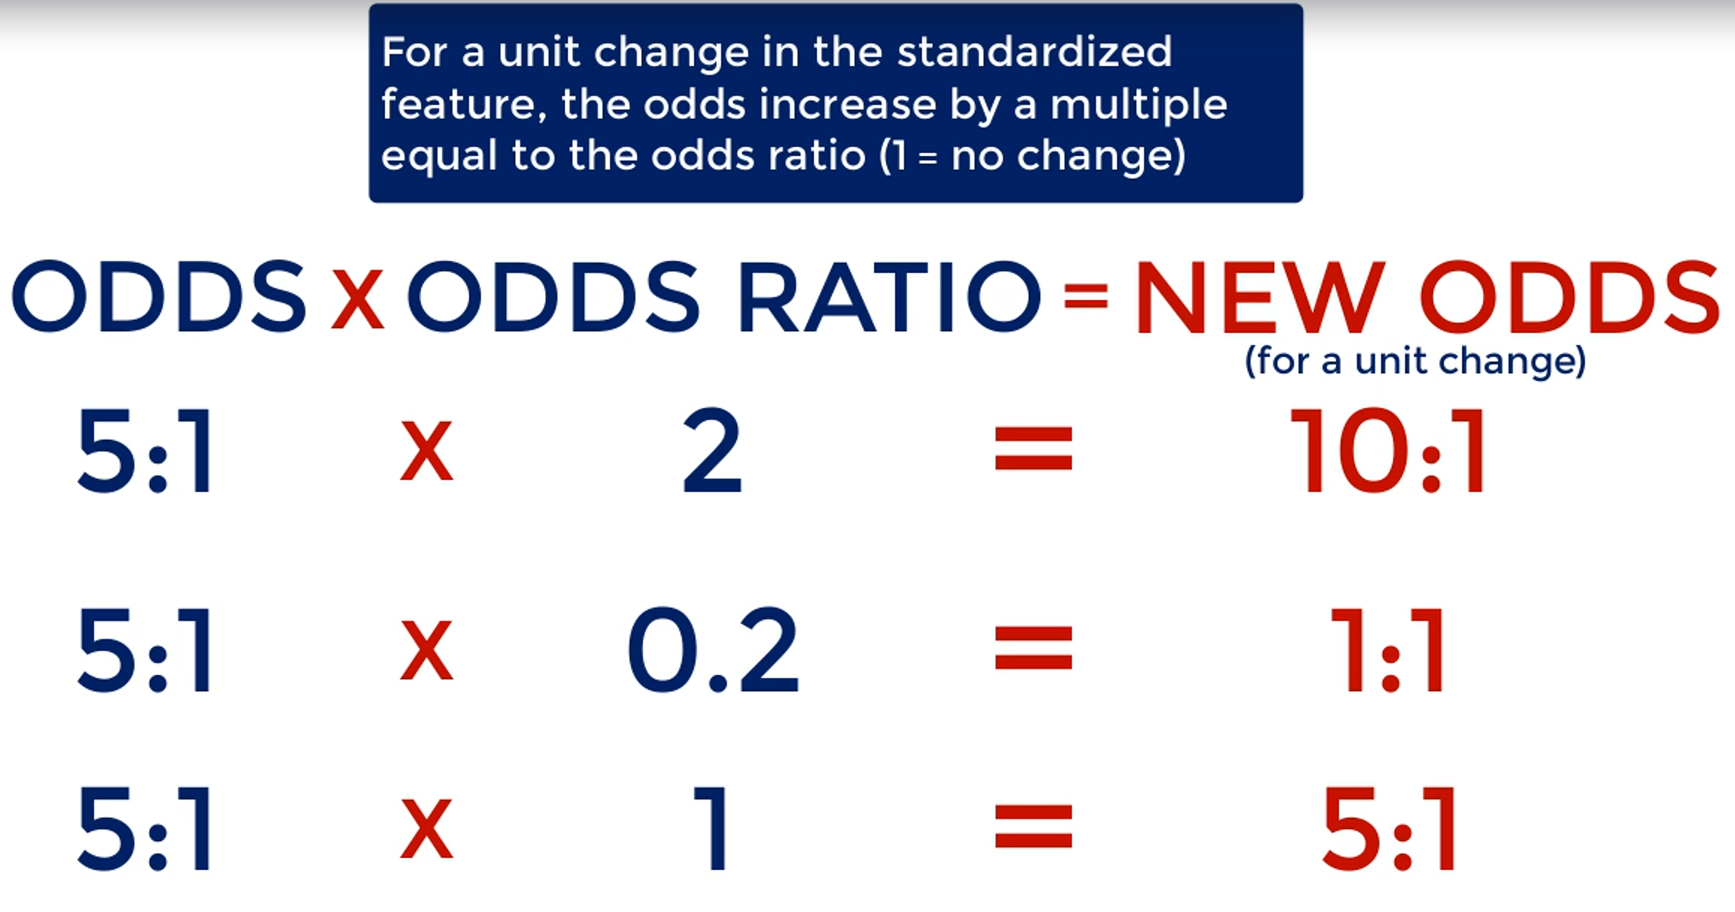